Assignment: Simple Linear Regression 1

In [1]:
#Libraries

import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#model Library

import statsmodels.formula.api as smf

In [3]:
#For uploading the file

from google.colab import files
uploaded = files.upload()

Saving delivery_time (1).csv to delivery_time (1).csv


In [4]:
#Importing the Data

data = pd.read_csv("delivery_time (1).csv")

# EDA and Data Visualisation

In [5]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


This Data does not contain any NULL values
So, there is no need of treating the data.

<ipython-input-7-fd8df65c5d1c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Delivery Time'])


<Axes: xlabel='Delivery Time', ylabel='Density'>

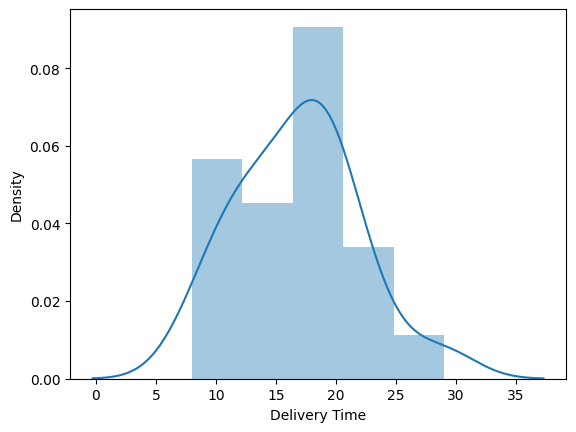

In [7]:
sns.distplot(data['Delivery Time'])

<ipython-input-8-971e7a7bfcf0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Sorting Time'])


<Axes: xlabel='Sorting Time', ylabel='Density'>

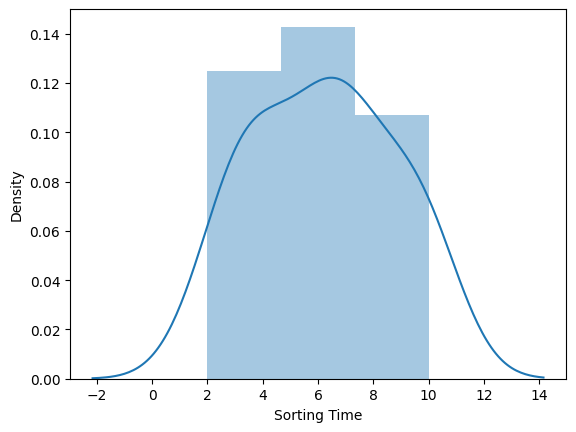

In [8]:
sns.distplot(data['Sorting Time'])

# Checking Correlation

In [9]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


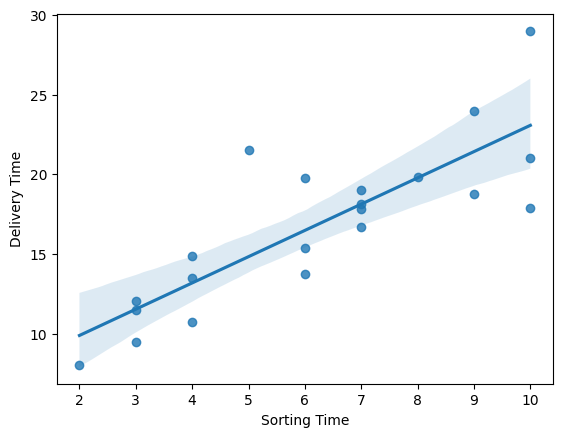

In [12]:
sns = sns.regplot(x="Sorting Time", y = "Delivery Time", data = data)

Feature Engineering

In [13]:
data = data.rename({'Delivery Time':'Deliverytime', 'Sorting Time':'Sortingtime'},axis=1)
data.head(10)

,Deliverytime,Sortingtime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## Model Building

Model Fitting

In [15]:
model = smf.ols("Deliverytime~Sortingtime", data = data).fit()

In [16]:
#Coefficint Parameters
model.params

Intercept      6.582734
Sortingtime    1.649020
dtype: float64

Always adjusted r2 has ti=o be less than the r2
The adjusted r2 value will be impacted if the b=neww data point will be useful for model

In [17]:
#Rsquared Values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

# Predicting fro New Data

In [19]:
# Manual prediction for sorting time
delivery_time = (6.582734) + (1.649020)*(7)
delivery_time

18.125874

In [20]:
# Adding and Predicting for New Data

new_data=pd.Series([5,9])
new_data

0    5
1    9
dtype: int64

In [26]:
data_pred=pd.DataFrame(new_data,columns=['Sortingtime'])
data_pred

,Sortingtime
0,5
1,9


In [27]:
model.predict(data_pred)

0    14.827833
1    21.423913
dtype: float64